# CW - Solutions

# Q1(a) 
Read in the csv file 'Football.csv' to create a dataframe. Remove the column named 'Referee'. In the 'League_Division' column remove the letter 'E' from the data entries. Create a function to convert all of the dates to a single number such that dates in the first 7 months take the last 2 digits of the year minus 11 and the dates in the last 5 months of the year take the last 2 digits of the year minus 10. (8 marks)

In [1]:
import numpy as np 
import pandas as pd 

In [4]:
df = pd.read_csv( "C:/Users/DELL/Downloads/Football (1).csv")   

In [5]:
df = df.drop(columns=['Referee'])  

In [6]:
df["League_Division"] = df["League_Division"].str.replace("E", "")

In [7]:
df2 = df.copy()

In [8]:
def conv(date):
    if (int(date[3:5]) < 8) :
        j=0
    else:
        j=1
    return (int(date[8:10])-11+j)

In [9]:
df2["Date"] = df.agg({"Date": lambda x: conv(x)})

In [10]:
df2

,League_Division,Date,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,...,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,0,0,Bolton,Fulham,0,0,D,0.0,0.0,D,...,9.0,7.0,12.0,13.0,4.0,8.0,1.0,3.0,0.0,0.0
1,0,0,Tottenham,Man City,0,0,D,0.0,0.0,D,...,18.0,7.0,13.0,16.0,10.0,3.0,0.0,2.0,0.0,0.0
2,0,0,Birmingham,Liverpool,0,0,D,0.0,0.0,D,...,3.0,8.0,8.0,9.0,4.0,3.0,1.0,0.0,0.0,0.0
3,0,0,Birmingham,Wigan,0,0,D,0.0,0.0,D,...,4.0,10.0,12.0,18.0,3.0,7.0,2.0,3.0,1.0,0.0
4,0,0,Fulham,Everton,0,0,D,0.0,0.0,D,...,2.0,7.0,15.0,13.0,4.0,5.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,3,12,Stockport,Hartlepool,1,1,D,1.0,0.0,H,...,10.0,3.0,11.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0
26200,3,12,Sutton,Carlisle,1,1,D,1.0,0.0,H,...,2.0,2.0,9.0,11.0,5.0,2.0,0.0,1.0,0.0,0.0
26201,3,12,Swindon,Crawley Town,2,1,H,2.0,0.0,H,...,8.0,4.0,11.0,13.0,7.0,3.0,1.0,2.0,0.0,0.0
26202,3,12,Tranmere,Northampton,0,1,A,0.0,1.0,A,...,0.0,1.0,8.0,5.0,9.0,8.0,1.0,1.0,0.0,0.0


# Q1(b) 
Using Matplotlib

(i) Create a Histogram of the number of games with a fixed number of goals scored by the home team in a game using 10 bins. (2 marks)

(ii) Create a Histogram of the number of games with a fixed number of goals scored by the away team in a game using 10 bins. (2 marks)

(iii) Create a Histogram of the number of games with a fixed number of goals scored in total in a game using 10 bins. (3 marks)

Comment on the mode in each histogram. (1 mark)

In [11]:
# Set up our Notebook environment
%matplotlib inline

# Import modules and functions
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [12]:
XH=pd.Series(df2["Full Time Home Team Goals"])
XA=pd.Series(df2["Full Time Away Team Goals"])
XT=pd.Series(df2["Full Time Home Team Goals"]+df2["Full Time Away Team Goals"])

In [11]:
XH

0        0
1        0
2        0
3        0
4        0
        ..
26199    1
26200    1
26201    2
26202    0
26203    2
Name: Full Time Home Team Goals, Length: 26204, dtype: int64

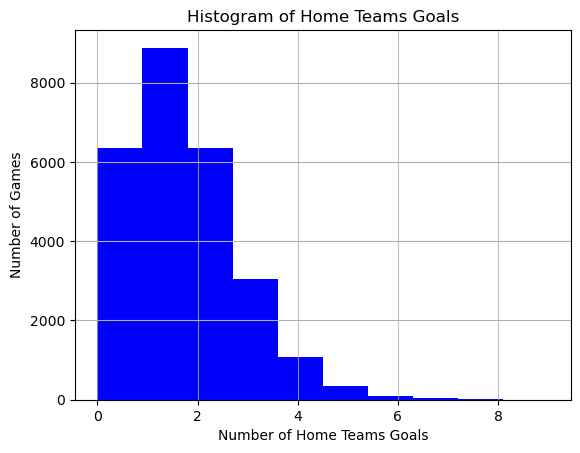

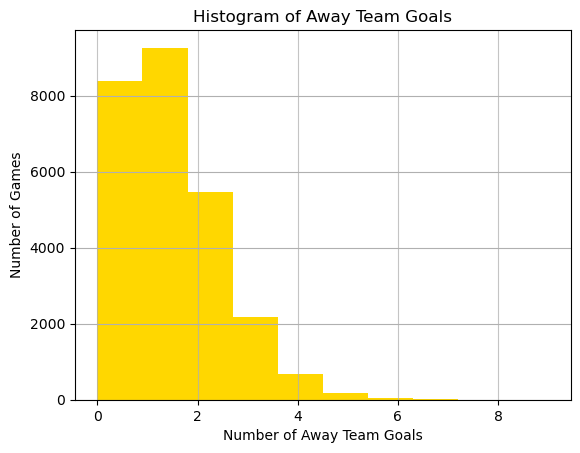

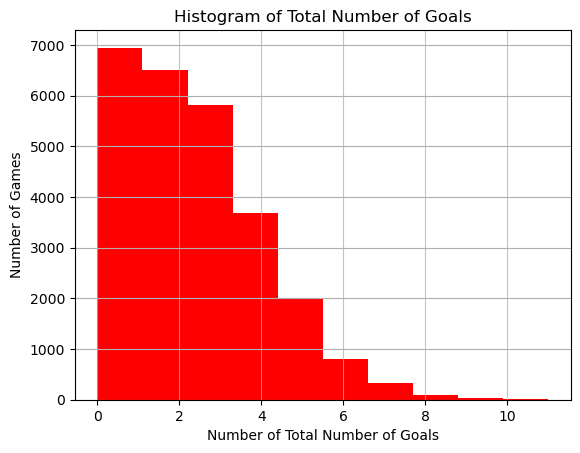

In [13]:
import pandas as pd
XH.plot.hist(grid=True, color='blue',bins=10)
plt.title('Histogram of Home Teams Goals')
plt.xlabel('Number of Home Teams Goals')
plt.ylabel('Number of Games')
plt.grid(axis='x', alpha=0.75)
plt.show()

XA.plot.hist(grid=True, color='gold',bins=10)
plt.title('Histogram of Away Team Goals')
plt.xlabel('Number of Away Team Goals')
plt.ylabel('Number of Games')
plt.grid(axis='x', alpha=0.75)
plt.show()

XT.plot.hist(grid=True, color='red',bins=10)
plt.title('Histogram of Total Number of Goals')
plt.xlabel('Number of Total Number of Goals')
plt.ylabel('Number of Games')
plt.grid(axis='x', alpha=0.75)
plt.show()

We see that the mode number of home and away goals are both 1, but the mode number of total goals is zero. 

# Q1(c) 
From now on, just use the data when the 'League_Division' is '0' and the 'Date' is 11. You may find it useful to introduce a column named 'Count' which equals 1 in every row to help with this question. Without using any built-in functions, calculate the mean and population standard deviation of the number of 
(i) goals scored by the home team in each game, 
(ii) goals scored by the away team in each game, and 
(iii) goals scored in total in each game. (6 marks)

Now repeat these calculations but this time use Python's built-in functions. (2 marks)


In [14]:
df3 = df2.copy()

In [15]:
df3 = df3.loc[(df3["League_Division"]=="0") & (df3["Date"]==11)]

In [16]:
df3["Count"] = df3["Date"]*0+1

In [17]:
YH = [*range(0,10)]
YA = [*range(0,10)]
for j in range(0,10):
    condition1 = df3["Full Time Home Team Goals"] == j
    condition2 = df3["Full Time Away Team Goals"] == j
    YH[j]=df3.loc[condition1,"Count"].sum()
    YA[j]=df3.loc[condition2,"Count"].sum()

In [19]:
YT = [*range(0,12)] 
for j in range(0,12):
    condition3 = df3["Full Time Home Team Goals"] + df3["Full Time Away Team Goals"] == j
    YT[j]=df3.loc[condition3,"Count"].sum()

In [20]:
mean_home_goals = 0
mean_away_goals = 0
mean_total_goals = 0
var_home_goals = 0
var_away_goals = 0
var_total_goals = 0
number_of_games = 0 
for i in range(0,10):
    number_of_games += YH[i]
    mean_home_goals += YH[i]*i
    mean_away_goals += YA[i]*i
    var_home_goals += YH[i]*i**2
    var_away_goals += YA[i]*i**2
mean_home_goals = mean_home_goals / number_of_games
mean_away_goals = mean_away_goals / number_of_games
sd_home_goals = np.sqrt(var_home_goals / number_of_games - mean_home_goals**2)
sd_away_goals = np.sqrt(var_away_goals / number_of_games - mean_away_goals**2)
for i in range(0,12):
    mean_total_goals += YT[i]*i
    var_total_goals += YT[i]*i**2
mean_total_goals = mean_total_goals / number_of_games
sd_total_goals = np.sqrt(var_total_goals / number_of_games - mean_total_goals**2)
print("Mean number of home goals is: ", mean_home_goals,"\nMean number of away goals is: ", mean_away_goals,"\nMean total number of goals is: ", mean_total_goals)
print("Std of home goals is: ", sd_home_goals,"\nStd of away goals is: ", sd_away_goals,"\nStd of total goals is: ", sd_total_goals)

Mean number of home goals is:  1.513157894736842 
Mean number of away goals is:  1.305263157894737 
Mean total number of goals is:  2.818421052631579
Std of home goals is:  1.3247981082794584 
Std of away goals is:  1.257178831733357 
Std of total goals is:  1.624217263007484


In [21]:
print(df3["Full Time Home Team Goals"].mean(),
df3["Full Time Away Team Goals"].mean(),df3["Full Time Home Team Goals"].mean()+df3["Full Time Away Team Goals"].mean(),"\n",
df3["Full Time Home Team Goals"].std(ddof=0),df3["Full Time Away Team Goals"].std(ddof=0),(df3["Full Time Home Team Goals"]+df3["Full Time Away Team Goals"]).std(ddof=0))

1.513157894736842 1.305263157894737 2.818421052631579 
 1.3247981082794573 1.2571788317333574 1.6242172630074865


# Q1(d)
Remove the columns 'League_Division', 'Date', 'HomeTeam', 'AwayTeam', 'Full Time Home Team Goals', 'Full Time Away Team Goals', 'Half Time Result' and 'Count'. You should split the data into (80\%) training data and (20\%) test data. Use an appropriate linear model from sklearn to predict the 'Full Time Result' using the remaining columns. Test your model using the test data set. Discuss the accuracy of your results. (6 marks) 

In [22]:
df4 = df3.drop(columns=["League_Division", "Date", "HomeTeam", "AwayTeam", "Half Time Result", "Full Time Home Team Goals", "Full Time Away Team Goals" 
, "Count"])

In [23]:
df4

,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
309,D,0.0,0.0,7.0,14.0,2.0,3.0,12.0,9.0,3.0,5.0,3.0,1.0,0.0,0.0
310,D,0.0,0.0,11.0,13.0,3.0,3.0,10.0,12.0,5.0,4.0,3.0,1.0,0.0,1.0
311,D,0.0,0.0,18.0,10.0,1.0,2.0,5.0,12.0,8.0,5.0,0.0,2.0,0.0,0.0
312,D,0.0,0.0,14.0,10.0,4.0,2.0,13.0,3.0,9.0,5.0,5.0,2.0,0.0,0.0
313,D,0.0,0.0,21.0,8.0,2.0,2.0,8.0,5.0,8.0,5.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23976,A,0.0,2.0,9.0,19.0,0.0,13.0,13.0,7.0,3.0,2.0,3.0,1.0,0.0,0.0
24026,A,1.0,3.0,7.0,16.0,3.0,5.0,2.0,10.0,6.0,2.0,0.0,1.0,0.0,0.0
24027,A,1.0,2.0,13.0,13.0,5.0,7.0,4.0,6.0,7.0,3.0,0.0,1.0,0.0,0.0
24076,A,1.0,1.0,15.0,20.0,4.0,8.0,9.0,13.0,3.0,5.0,4.0,3.0,0.0,0.0


In [24]:
Y = df4['Full Time Result']
df5 = df4.drop(columns=['Full Time Result'])
X = df5.iloc[:, :30]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
      
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)
y_model = model.predict(X_test)
print(y_model[0:5])
print(y_test[0:5])
from sklearn.metrics import accuracy_score # We use sklearn to import accurac_score which measures how accurate the model is
print("Accuracy:", np.round(accuracy_score(y_test, y_model), 4)) # Here we round the accuracy to 4 decimal places

(304, 14) (76, 14) (304,) (76,)
['H' 'H' 'H' 'H' 'A']
6376     H
13028    H
2304     H
21979    A
17731    A
Name: Full Time Result, dtype: object
Accuracy: 0.7237


In [26]:
from sklearn.metrics import classification_report

In [27]:
class_rep = classification_report(y_test, y_model)
print("Classification:\n", class_rep)

Classification:
               precision    recall  f1-score   support

           A       0.73      0.88      0.80        25
           D       0.50      0.31      0.38        16
           H       0.78      0.80      0.79        35

    accuracy                           0.72        76
   macro avg       0.67      0.66      0.66        76
weighted avg       0.70      0.72      0.71        76



Although 72% is okay, we have included the half time goals so we have given sklearn a lot of information about each game

# Q1(e) 
Now go back to your dataframe in part (c). Remove the columns 'Date', 'Count' and 'League_Division'. In the 'Full Time Result' and 'Half Time Result' columns, 
replace 'H' by 2, 'D' by 1 and 'A' by 0. Obtain the pairwise correlation matrix of your data frame 
and discuss any significant correlations. (5 marks)

In [33]:
df5=df3.copy()
df5 = df5.drop(columns=["Date", "Count", "League_Division"])
df5["FTResult"] = df5["Home Team Corners"]
df5["HTResult"] = df5["Home Team Corners"]

In [34]:
condition1 = df5["Full Time Result"] == "H"
df5.loc[condition1,"FTResult"] = 2
condition2 = df5["Full Time Result"] == "D"
df5.loc[condition2,"FTResult"] = 1
condition3 = df5["Full Time Result"] == "A"
df5.loc[condition3,"FTResult"] = 0
condition4 = df5["Half Time Result"] == "H"
df5.loc[condition4,"HTResult"] = 2
condition5 = df5["Half Time Result"] == "D"
df5.loc[condition5,"HTResult"] = 1
condition6 = df5["Half Time Result"] == "A"
df5.loc[condition6,"HTResult"] = 0

In [35]:
df5["Full Time Result"] = df5["FTResult"]
df5["Half Time Result"] = df5["HTResult"]
df5 = df5.drop(columns=["FTResult", "HTResult"])

In [36]:
df5.corr()

ValueError: could not convert string to float: 'Crystal Palace'

We see that there is a 70% correlation between full time home goals and half time home goals, a 64% correlation between full time home goals and home team shots on target and a 40% correlation between full time home goals and home team shots. Similarly there  there is a 72% correlation between full time away goals and half time away goals, a 65% correlation between full time away goals and away team shots on target and a 42% correlation between full time away goals and away team shots. 
We see that there is a 52% correlation between home teams corners and home team shots and a 56% correlation between away teams corners and away team shots.

# Q1(f) 
Create 4 new columns such that, over their 19 games, 'H\_score' is each home teams mean of 'Full Time Home Team Goals', 
'A_score', is each away teams mean of 'Full Time Away Team Goals', 
'H_conceed' is each home teams mean of 'Full Time Away Team Goals', 
'A_conceed' is each away teams mean of 'Full Time Home Team Goals'. 
Ensure you average over the Home Team or the Away Team appropriately. 
Finally, remove the 15 columns 
'Half Time Home Team Goals', 'Half Time Away Team Goals',
'Half Time Result', 'Home Team Shots', 'Away Team Shots',
'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Team Fouls Committed',
'Away Team Fouls Committed','Home Team Corners', 'Away Team Corners', 
'Home Team Yellow Cards', 'Away Team Yellow Cards', 'Home Team Red Cards', 'Away Team Red Cards'. (5 marks)

In [37]:
Teams = df5["HomeTeam"].unique()

In [38]:
Teams

array(['Crystal Palace', 'Southampton', 'Man City', 'Burnley', 'Brighton',
       'Norwich', 'Everton', 'Wolves', 'Arsenal', 'Brentford',
       'Man United', 'Leicester', 'Watford', 'Tottenham', 'Leeds',
       'West Ham', 'Newcastle', 'Liverpool', 'Chelsea', 'Aston Villa'],
      dtype=object)

In [39]:
for i in Teams:
    df5.loc[df5["HomeTeam"] == i,"H_score"] = df5.loc[df5["HomeTeam"] == i,"Full Time Home Team Goals"].sum()/19
    df5.loc[df5["AwayTeam"] == i,"A_score"] = df5.loc[df5["AwayTeam"] == i,"Full Time Away Team Goals"].sum()/19
    df5.loc[df5["HomeTeam"] == i,"H_conceed"] = df5.loc[df5["HomeTeam"] == i,"Full Time Away Team Goals"].sum()/19
    df5.loc[df5["AwayTeam"] == i,"A_conceed"] = df5.loc[df5["AwayTeam"] == i,"Full Time Home Team Goals"].sum()/19

In [40]:
df5

,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,Home Team Shots,Away Team Shots,...,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,H_score,A_score,H_conceed,A_conceed
309,Crystal Palace,Brentford,0,0,1.0,0.0,0.0,1.0,7.0,14.0,...,3.0,5.0,3.0,1.0,0.0,0.0,1.421053,1.368421,0.894737,1.842105
310,Southampton,West Ham,0,0,1.0,0.0,0.0,1.0,11.0,13.0,...,5.0,4.0,3.0,1.0,0.0,1.0,1.210526,1.421053,1.263158,1.315789
311,Man City,Southampton,0,0,1.0,0.0,0.0,1.0,18.0,10.0,...,8.0,5.0,0.0,2.0,0.0,0.0,3.052632,1.052632,0.789474,2.263158
312,Burnley,Norwich,0,0,1.0,0.0,0.0,1.0,14.0,10.0,...,9.0,5.0,5.0,2.0,0.0,0.0,0.947368,0.578947,1.315789,2.157895
313,Brighton,Arsenal,0,0,1.0,0.0,0.0,1.0,21.0,8.0,...,8.0,5.0,2.0,1.0,0.0,0.0,1.000000,1.368421,1.210526,1.631579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23976,Norwich,Tottenham,0,5,0.0,0.0,2.0,0.0,9.0,19.0,...,3.0,2.0,3.0,1.0,0.0,0.0,0.631579,1.631579,2.263158,1.105263
24026,Wolves,Man City,1,5,0.0,1.0,3.0,0.0,7.0,16.0,...,6.0,2.0,0.0,1.0,0.0,0.0,1.052632,2.157895,1.315789,0.578947
24027,Watford,Leicester,1,5,0.0,1.0,2.0,0.0,13.0,13.0,...,7.0,3.0,0.0,1.0,0.0,0.0,0.894737,1.473684,2.421053,1.894737
24076,Everton,Watford,2,5,0.0,1.0,1.0,1.0,15.0,20.0,...,3.0,5.0,4.0,3.0,0.0,0.0,1.421053,0.894737,1.315789,1.631579


In [41]:
df5 = df5.drop(columns=['Half Time Home Team Goals', 'Half Time Away Team Goals',
       'Half Time Result', 'Home Team Shots', 'Away Team Shots',
       'Home Team Shots on Target', 'Away Team Shots on Target',
       'Home Team Fouls Committed', 'Away Team Fouls Committed',
       'Home Team Corners', 'Away Team Corners', 'Home Team Yellow Cards',
       'Away Team Yellow Cards', 'Home Team Red Cards', 'Away Team Red Cards'])

In [42]:
df5

,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,H_score,A_score,H_conceed,A_conceed
309,Crystal Palace,Brentford,0,0,1.0,1.421053,1.368421,0.894737,1.842105
310,Southampton,West Ham,0,0,1.0,1.210526,1.421053,1.263158,1.315789
311,Man City,Southampton,0,0,1.0,3.052632,1.052632,0.789474,2.263158
312,Burnley,Norwich,0,0,1.0,0.947368,0.578947,1.315789,2.157895
313,Brighton,Arsenal,0,0,1.0,1.000000,1.368421,1.210526,1.631579
...,...,...,...,...,...,...,...,...,...
23976,Norwich,Tottenham,0,5,0.0,0.631579,1.631579,2.263158,1.105263
24026,Wolves,Man City,1,5,0.0,1.052632,2.157895,1.315789,0.578947
24027,Watford,Leicester,1,5,0.0,0.894737,1.473684,2.421053,1.894737
24076,Everton,Watford,2,5,0.0,1.421053,0.894737,1.315789,1.631579


# Q1 (g)
Now create two functions 'probh' and 'proba'. Each function has inputs a and b. The functions iterate through i=0 to 5 and j=0 to 5
and calculates p_{i,j} = a^i b^j exp(-a-b)/(i! j!). The function 'probh' returns the value of i that maximises p whilst the function 'proba' returns the value of j that maximises p. Also introduce a function called 'shift' which has 2 inputs a and b: 
shift(a,b) = 2 if a>b, 1 if a=b , and 0 if a<b. 

Now introduce 5 new columns named 'HLamb', 'ALamb', 
'HPredict', 'APredict' and 'RPredict'. Define 2 of the columns using 

'HLamb' = 'H_score' x 0.56 + 'A_conceed' x 0.29 + 0.48, 

'ALamb'='A_score' x  0.76 + 'H_conceed' x 0.4 + 0.21, 

(These parameter values have been chosen to give a better fit in this data set). Define the other 3 columns using 

'HPredict' = probh('HLamb','ALamb') 

'APredict' = proba('HLamb','ALamb') 

'RPredict' = shift('HPredict','APredict'). (10 marks)

In [43]:
import math
def probh(a,b):
    p=np.zeros((5,5))
    pmax=0
    for i in range(0,5):
        for j in range (0,5):
            p[i,j]=a**i*b**j/math.factorial(i)/math.factorial(j)*np.exp(-a-b)
            if p[i,j] > pmax : 
                pmax = p[i,j]
                imax=i
    return imax

In [44]:
import math
def proba(a,b):
    p=np.zeros((5,5))
    pmax=0
    for i in range(0,5):
        for j in range (0,5):
            p[i,j]=a**i*b**j/math.factorial(i)/math.factorial(j)*np.exp(-a-b)
            if p[i,j] > pmax : 
                pmax = p[i,j]
                jmax=j
    return jmax

In [45]:
import math
def shift(a,b):
    if a>b: c=2
    if a==b: c=1
    if a<b: c=0
    return c

In [46]:
df5["HLamb"]=df5["H_score"]*0.56+df5["A_conceed"]*0.29+0.48
df5["ALamb"]=df5["A_score"]*0.76+df5["H_conceed"]*0.4+0.21
df5["HPredict"]=df5.apply(lambda x: probh(x["HLamb"],x["ALamb"]),axis=1)
df5["APredict"]=df5.apply(lambda x: proba(x["HLamb"],x["ALamb"]),axis=1)
df5["RPredict"]=df5.apply(lambda x: shift(x["HPredict"],x["APredict"]),axis=1)
((df5["HPredict"]-df5["Full Time Home Team Goals"])**2).sum()+((df5["APredict"]-df5["Full Time Away Team Goals"])**2).sum()
((df5["RPredict"]-df5["Full Time Result"])**2).sum()

237.0

In [47]:
df5()

,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,H_score,A_score,H_conceed,A_conceed,HLamb,ALamb,HPredict,APredict,RPredict
309,Crystal Palace,Brentford,0,0,1.0,1.421053,1.368421,0.894737,1.842105,1.810000,1.607895,1,1,1
310,Southampton,West Ham,0,0,1.0,1.210526,1.421053,1.263158,1.315789,1.539474,1.795263,1,1,1
311,Man City,Southampton,0,0,1.0,3.052632,1.052632,0.789474,2.263158,2.845789,1.325789,2,1,2
312,Burnley,Norwich,0,0,1.0,0.947368,0.578947,1.315789,2.157895,1.636316,1.176316,1,1,1
313,Brighton,Arsenal,0,0,1.0,1.000000,1.368421,1.210526,1.631579,1.513158,1.734211,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23976,Norwich,Tottenham,0,5,0.0,0.631579,1.631579,2.263158,1.105263,1.154211,2.355263,1,2,0
24026,Wolves,Man City,1,5,0.0,1.052632,2.157895,1.315789,0.578947,1.237368,2.376316,1,2,0
24027,Watford,Leicester,1,5,0.0,0.894737,1.473684,2.421053,1.894737,1.530526,2.298421,1,2,0
24076,Everton,Watford,2,5,0.0,1.421053,0.894737,1.315789,1.631579,1.748947,1.416316,1,1,1


# 1(h)
Now copy the dataframe and remove the 4 columns 'HomeTeam', 'AwayTeam', 'Full Time Home Team Goals', and 'Full Time Away Team Goals'. You are going to try to predict 'Full Time Result' using the remaining columns. 
Now split the data into (80%) training data and (20%) test data. Create any regression model you like using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (12 marks)

In [48]:
df6 = df5.copy()

In [49]:
df6 = df6.drop(columns=['HomeTeam', 'AwayTeam', 'Full Time Home Team Goals',
       'Full Time Away Team Goals'])

In [50]:
df6

,Full Time Result,H_score,A_score,H_conceed,A_conceed,HLamb,ALamb,HPredict,APredict,RPredict
309,1.0,1.421053,1.368421,0.894737,1.842105,1.810000,1.607895,1,1,1
310,1.0,1.210526,1.421053,1.263158,1.315789,1.539474,1.795263,1,1,1
311,1.0,3.052632,1.052632,0.789474,2.263158,2.845789,1.325789,2,1,2
312,1.0,0.947368,0.578947,1.315789,2.157895,1.636316,1.176316,1,1,1
313,1.0,1.000000,1.368421,1.210526,1.631579,1.513158,1.734211,1,1,1
...,...,...,...,...,...,...,...,...,...,...
23976,0.0,0.631579,1.631579,2.263158,1.105263,1.154211,2.355263,1,2,0
24026,0.0,1.052632,2.157895,1.315789,0.578947,1.237368,2.376316,1,2,0
24027,0.0,0.894737,1.473684,2.421053,1.894737,1.530526,2.298421,1,2,0
24076,0.0,1.421053,0.894737,1.315789,1.631579,1.748947,1.416316,1,1,1


In [51]:
YY = df6['Full Time Result']
df7 = df6.drop(columns=['Full Time Result'])
XX = df7.iloc[:, :55]
X=XX.iloc[:].to_numpy(dtype=np.float64)
Y=YY.iloc[:].to_numpy(dtype=np.float64)

#X_min=np.min(X,axis=0)
#X_max=np.max(X,axis=0)
#Y_min=np.min(Y,axis=0)
#Y_max=np.max(Y,axis=0)
#X_norm=(X-X_min)/(X_max-X_min)
#Y_norm=(Y-Y_min)/(Y_max-Y_min)
#
#X=X_norm
#Y=Y_norm

In [52]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_train_torch= torch.FloatTensor(X_train)
X_test_torch= torch.FloatTensor(X_test)
Y_train_torch= torch.FloatTensor(y_train).view(-1, 1)
Y_test_torch= torch.FloatTensor(y_test).view(-1, 1)

(304, 9) (76, 9) (304,) (76,)


In [54]:
class MyBasic(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
#        self.linear1 = nn.Linear(input_dim, output_dim)
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.nonlinear2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.nonlinear2(out1)
        out3 = self.linear3(out2)
        return out3

In [55]:
input_dim = 9
output_dim = 1
hidden_dim = 6
model = MyBasic(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [59]:
for iter in range(0,50000):
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    # Forward pass to get outputs
    outputs = model(X_train_torch)
    # Calculate Loss: MSE
    loss = criterion(outputs, Y_train_torch)
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()
    #LOSS

    correct = 0
    total = 0
    if iter % 5000 == 0:
        # Calculate Accuracy
        
        # Load images to a Torch Variable
        Xin = Variable(X_train_torch)
        Yin = Variable(Y_train_torch)

        # Forward pass only to get logits/output
        outputs = model(Xin)
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        # Total number of labels
        total = Yin.size(0)
        # Total correct predictions
        correct = (predicted == Yin).sum()
        accuracy = 100 * correct / total
        # Print Loss
        print("Iteration: {}. Loss: {}.".format(iter, loss))

print('Training Error= ',criterion(model(X_train_torch), Y_train_torch) )
print('Testing Error= ',criterion(model(X_test_torch), Y_test_torch) )   

Iteration: 0. Loss: 0.5499208569526672.
Iteration: 5000. Loss: 0.5491524338722229.
Iteration: 10000. Loss: 0.5484317541122437.
Iteration: 15000. Loss: 0.5480659008026123.
Iteration: 20000. Loss: 0.5478091835975647.
Iteration: 25000. Loss: 0.5476174354553223.
Iteration: 30000. Loss: 0.5474489331245422.
Iteration: 35000. Loss: 0.5473306179046631.
Iteration: 40000. Loss: 0.547229528427124.
Iteration: 45000. Loss: 0.5471490025520325.
Training Error=  tensor(0.5471, grad_fn=<MseLossBackward0>)
Testing Error=  tensor(0.4734, grad_fn=<MseLossBackward0>)


In [49]:
# TEST
outputs = model(X_test_torch)
# Get prediction
Pr=torch.max(outputs.data, 1).values
# Set total error and total values
total_error=0

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(Y_test_torch, Pr))
print("Mean Squared Error: ", mean_squared_error(Y_test_torch, Pr))
print("R-squared: ", r2_score(Y_test_torch, Pr))

Mean Absolute Error:  0.55342484
Mean Squared Error:  0.45463267
R-squared:  0.3530528880180719


In [50]:
Pr

tensor([ 1.6510,  1.7005,  1.4161,  1.5519,  1.3039,  1.2789,  1.0622,  0.6504,
         0.5157,  1.7598,  1.1807,  1.3112,  1.2337,  1.6519,  0.4349,  0.5076,
         1.3803,  0.8376,  1.4027,  0.8946,  1.6937,  1.7380,  0.9591,  1.2063,
         0.5212,  1.0885,  1.8212,  1.9871,  1.7166,  1.0489,  0.4971,  1.1854,
         1.6555,  1.1587,  0.1264,  1.1187,  0.2855,  0.6123,  0.7181,  1.0442,
         1.5036,  1.3803,  1.7038,  0.3596,  1.2259,  1.2435,  0.9293,  0.3820,
         1.5450,  0.3135,  0.9496,  0.9889,  1.1411, -0.0222,  1.3578,  1.6605,
         0.7642,  1.0544,  1.3145,  0.2628,  1.7862,  1.6784,  1.3488,  1.2350,
         1.1936,  1.1025,  1.1786,  1.2894,  0.5477,  1.2383,  0.7912,  0.8551,
         0.9166,  0.0970,  0.8752,  1.1141])

# Q1(i)
Using SQLite Studio. Read in the csv file 'Football.csv' to create a table. Remove the column named 'Referee'. In the 'League_Division' column remove the letter 'E'. Convert all of the dates to a single number such that dates in the first 7 months take the last 2 digits of the year minus 11 and the dates in the last 5 months of the year take the last 2 digits of the year minus 10. (8 marks)